<a href="https://colab.research.google.com/github/sajib-222/Data-Mining-and-warehouse/blob/main/project_3_Domain_Specific_Search_Engine_with_Crawling_and_Link_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [19]:
import nltk
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')
print(STOPWORDS)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [4]:
from collections import defaultdict

# Inverted index: word -> set of URLs
inverted_index = defaultdict(set)
url_list = set()

In [5]:
# This dictionary will be used to build the connection between links
web_connection = {'source':[], 'target':[]}

In [6]:
import re
# This function will clean the content of web page in order to build the inverted index.
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())  # Remove punctuation and lowercase
    tokens = text.split()
    return [t for t in tokens if t not in STOPWORDS and len(t) > 1]

In [7]:
from urllib.parse import urljoin, urlparse
# The crawl function has 5 parameters
# url = The url to crawl
# base_domain = the base domain of the url. During crawling, the crawler will ignore links from other domains

def crawl(url, base_domain, visited, visit_limit, limit):
    if limit==0 or len(visited)==visit_limit:
        return

    try:
        response = requests.get(url, timeout=5)
        if response.status_code != 200:
            return
    except requests.RequestException:
        return

    visited.add(url)
    print("-"*(10-limit), end=" ")
    print(f"Crawled: {url}")

    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text(separator=' ', strip=True)
    words = clean_and_tokenize(text)

    for word in words:
        inverted_index[word].add(url)
        url_list.add(url)

    # Recursively follow links
    for tag in soup.find_all('a', href=True):
        link = urljoin(url, tag['href'])
        parsed = urlparse(link)

        # Store external links as connection
        web_connection['source'].append(url)
        web_connection['target'].append(link)

        if parsed.netloc == base_domain and link not in visited:
            crawl(link, base_domain, visited, visit_limit, limit-1)

In [8]:
def crawl_roots(root_urls, max_per_root=2, visit_limit=50):
    for root in root_urls:
        print(f"\nStarting crawl from: {root}")
        domain = urlparse(root).netloc
        visited = set()
        crawl(root, domain, visited, visit_limit, max_per_root)

In [9]:
seed_urls = [
    'https://www.edx.org',
    'https://www.udemy.com',
    'https://www.thinkific.com',
    'https://www.teachable.com',
    'https://www.learnworlds.com',
    'https://www.hippovideo.io',
    'https://www.dacast.com',
    'https://www.muvi.com',
    'https://www.proxlearn.com',
    'https://fullmind.com',
]

crawl_roots(seed_urls, max_per_root=2)


Starting crawl from: https://www.edx.org
-------- Crawled: https://www.edx.org
--------- Crawled: https://www.edx.org/
--------- Crawled: https://www.edx.org/learn/computer-science/harvard-university-cs50-s-introduction-to-computer-science
--------- Crawled: https://www.edx.org/executive-education/massachusetts-institute-of-technology-artificial-intelligence-implications-for-business-strategy
--------- Crawled: https://www.edx.org/masters/micromasters/mitx-supply-chain-management
--------- Crawled: https://www.edx.org/learn/government/harvard-university-american-government-constitutional-foundations
--------- Crawled: https://www.edx.org/learn/democracy/harvard-university-we-the-people-civic-engagement-in-a-constitutional-democracy
--------- Crawled: https://www.edx.org/search?q=data science
--------- Crawled: https://www.edx.org/search?q=ai
--------- Crawled: https://www.edx.org/search?q=finance
--------- Crawled: https://www.edx.org/search?q=business
--------- Crawled: https://www.e

/tmp/ipython-input-7-3075972795.py:21: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(response.text, 'html.parser')


--------- Crawled: https://fullmind.com/comments/feed/
--------- Crawled: https://fullmind.com/wp-content/uploads/2011/09/Fulmind-experiences.png
--------- Crawled: https://fullmind.com/metodo-fullmind
--------- Crawled: https://fullmind.com/wp-login.php?action=register
--------- Crawled: https://fullmind.com/metodo-fullmind/istruzioni


In [10]:
# print inverted index
print("\nSample inverted index (first 20 words):")
for word in list(inverted_index.keys())[:20]:
    print(f"{word}: {list(inverted_index[word])}")


Sample inverted index (first 20 words):
edx: ['https://www.edx.org/learn/excel', 'https://www.edx.org/learn/computer-science/harvard-university-cs50-s-introduction-to-computer-science', 'https://www.edx.org/bachelors/computer-data-sciences', 'https://www.edx.org/masters/micromasters/mitx-supply-chain-management', 'https://www.edx.org/become/how-to-become-a-cybersecurity-analyst', 'https://www.edx.org/masters/online-masters-in-data-science', 'https://www.edx.org/search?q=finance', 'https://www.edx.org', 'https://www.edx.org/learn/computer-programming', 'https://www.edx.org/masters/healthcare', 'https://www.edx.org/search?q=business', 'https://www.edx.org/learn/blockchain', 'https://www.edx.org/become/how-to-become-a-software-developer', 'https://www.edx.org/masters/online-mba', 'https://www.edx.org/bachelors/bachelors-in-public-health-online', 'https://www.edx.org/masters/masters-in-public-health-online', 'https://www.edx.org/masters/masters-in-education-online', 'https://www.edx.org/b

In [11]:
# Print first 20 connections
for source, target in list(zip(web_connection['source'], web_connection['target']))[:20]:
    print(f"{source} -> {target}")

https://www.edx.org -> https://www.edx.org/
https://www.edx.org/ -> https://www.edx.org/
https://www.edx.org/ -> https://www.edx.org/learn/computer-science/harvard-university-cs50-s-introduction-to-computer-science
https://www.edx.org/ -> https://www.edx.org/executive-education/massachusetts-institute-of-technology-artificial-intelligence-implications-for-business-strategy
https://www.edx.org/ -> https://www.edx.org/masters/micromasters/mitx-supply-chain-management
https://www.edx.org/ -> https://www.edx.org/learn/government/harvard-university-american-government-constitutional-foundations
https://www.edx.org/ -> https://www.edx.org/learn/democracy/harvard-university-we-the-people-civic-engagement-in-a-constitutional-democracy
https://www.edx.org/ -> https://www.edx.org/search?q=data science
https://www.edx.org/ -> https://www.edx.org/search?q=ai
https://www.edx.org/ -> https://www.edx.org/search?q=finance
https://www.edx.org/ -> https://www.edx.org/search?q=business
https://www.edx.or

# Creating graph from web connections

In [12]:
web_graph = nx.DiGraph()
for source, target in zip(web_connection['source'], web_connection['target']):
  web_graph.add_edge(source, target) # Iterate through source and target lists using zip

/tmp/ipython-input-26-1532184406.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


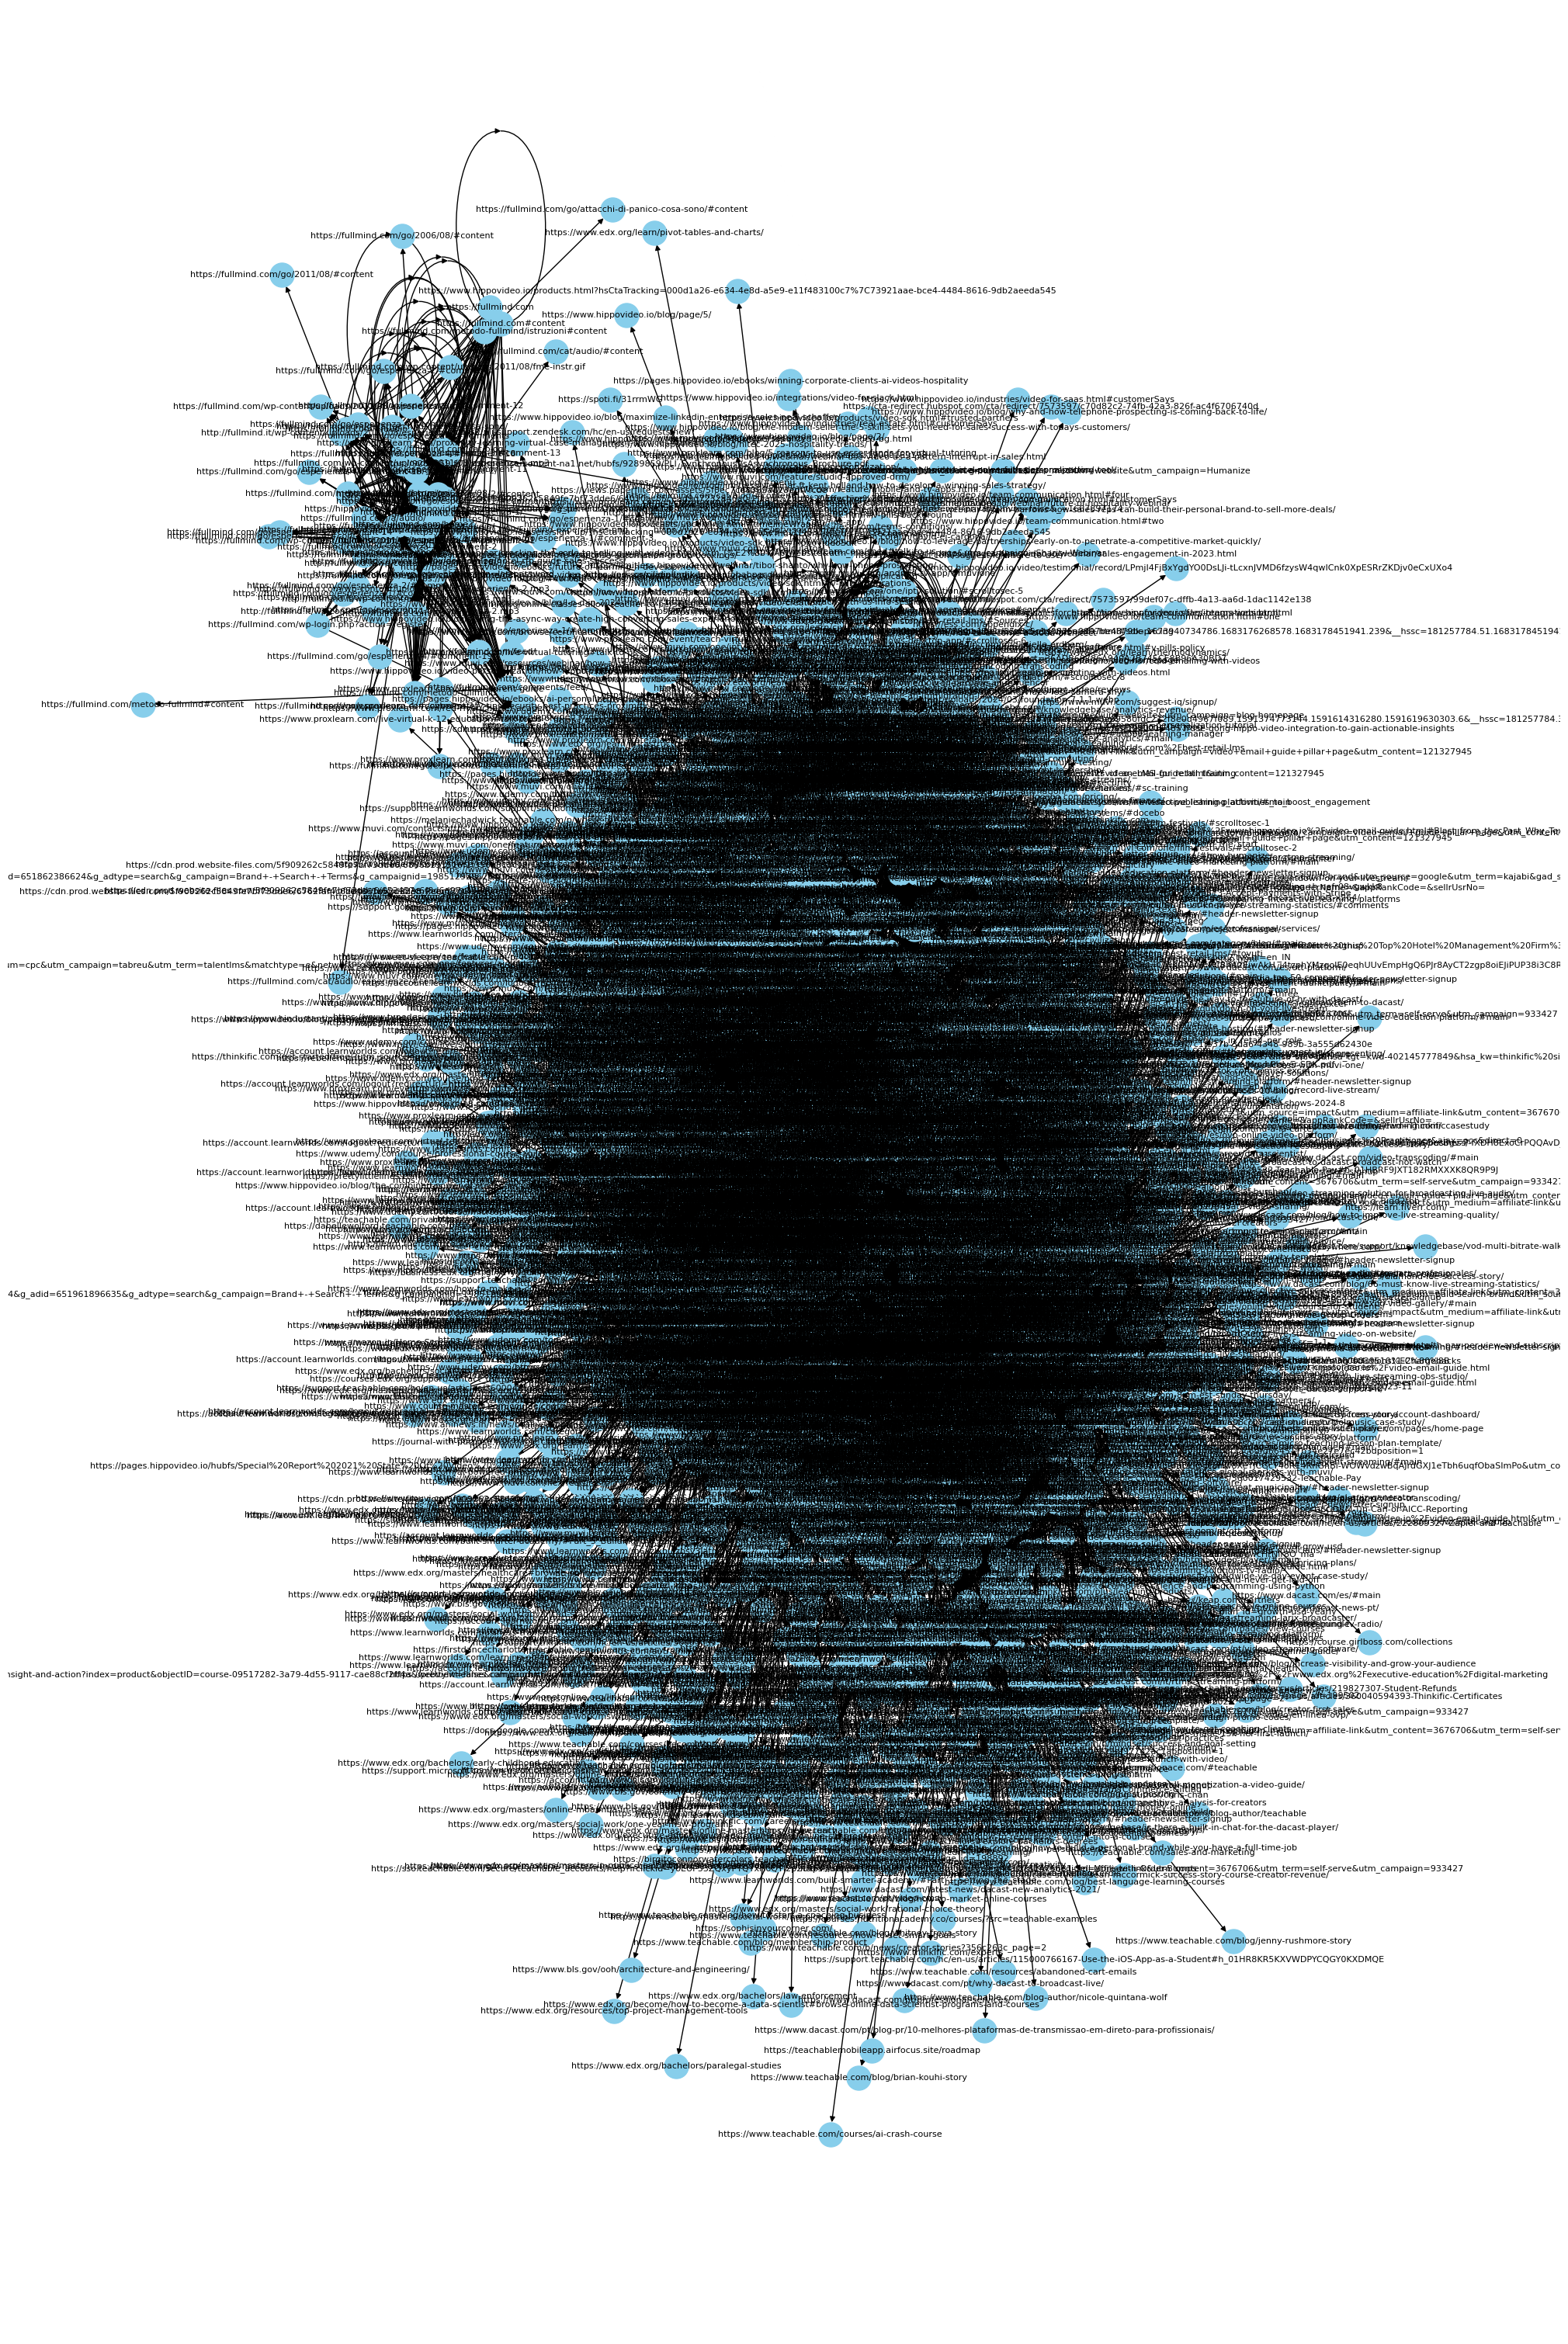

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))

# Layout and draw
pos = nx.spring_layout(web_graph, k=0.5, seed=42)
nx.draw(
    web_graph,
    pos=pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=8,
    font_color="black",
    arrowsize=10
)
plt.tight_layout()
plt.show()

# Calculating PageRank Scores

In [27]:
pagerank_scores = nx.pagerank(web_graph, alpha=0.85, max_iter=100, tol=1e-6)
print("\nPageRank Scores:", pagerank_scores)


PageRank Scores: {'https://www.edx.org': 0.0001995082630580098, 'https://www.edx.org/': 0.0003725285131108532, 'https://www.edx.org/learn/computer-science/harvard-university-cs50-s-introduction-to-computer-science': 0.0003725285131108532, 'https://www.edx.org/executive-education/massachusetts-institute-of-technology-artificial-intelligence-implications-for-business-strategy': 0.0003725285131108532, 'https://www.edx.org/masters/micromasters/mitx-supply-chain-management': 0.0003725285131108532, 'https://www.edx.org/learn/government/harvard-university-american-government-constitutional-foundations': 0.0003725285131108532, 'https://www.edx.org/learn/democracy/harvard-university-we-the-people-civic-engagement-in-a-constitutional-democracy': 0.0003725285131108532, 'https://www.edx.org/search?q=data science': 0.0003725285131108532, 'https://www.edx.org/search?q=ai': 0.0003725285131108532, 'https://www.edx.org/search?q=finance': 0.0003725285131108532, 'https://www.edx.org/search?q=business': 

# Search Function

In [28]:
def search_engine(query, index, scores):
    query_terms = query.lower().split()
    results = set()
    for term in query_terms:
        if term in index:
            if not results:
                results = set(index[term])
            else:
                results = results.intersection(index[term])  # Find common websites

    # Sort results based on score
    ranked_results = []
    for website in results:
        if website in scores:
          ranked_results.append((website, scores[website]))
    ranked_results.sort(key=lambda x: x[1], reverse=True)

    return ranked_results

# Query and display results

In [29]:
query = "math"
print(f"\nSearch Results for '{query}' using PageRank:")
results = search_engine(query, inverted_index, pagerank_scores)

for page, score in results:
    print(f"{page}: ({score})")


Search Results for 'math' using PageRank:
https://www.proxlearn.com/: (0.00045797486228256587)
https://www.proxlearn.com/teach-with-us: (0.00045797486228256587)
https://www.proxlearn.com/by-the-numbers: (0.0004412774214100907)
https://www.proxlearn.com/courses: (0.0004412774214100907)
https://www.teachable.com/industry/academics-and-languages: (0.0004305808773802933)
https://www.edx.org/learn: (0.0003725285131108532)
https://www.edx.org/bachelors/computer-data-sciences: (0.0003725285131108532)
https://www.edx.org/bachelors/psychology: (0.0003725285131108532)
https://www.edx.org/: (0.0003725285131108532)
https://www.edx.org/masters/online-masters-in-data-science: (0.0003725285131108532)
https://www.edx.org/become/how-to-become-a-data-scientist: (0.0003725285131108532)
https://www.edx.org/masters/healthcare: (0.0003725285131108532)
https://www.edx.org/bachelors: (0.0003725285131108532)
https://www.edx.org/masters/masters-in-public-health-online: (0.0003725285131108532)
https://www.edx.o